In [33]:
import numpy as np
import pandas as pd
import tqdm
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from collections import Counter

In [25]:
raw_data = pd.read_csv("/opt/ml/input/data/train_data.csv").sort_values("userID")
user_info = raw_data.pivot_table("KnowledgeTag","userID","assessmentItemID").fillna(0).sort_values("userID")
user_id = raw_data["userID"].unique()

In [17]:
##---------유저가 푼 문제들의 multi one hot encoding matrix 만들기-------
user_info_np = user_info.to_numpy()
for user in tqdm.tqdm(user_info_np) :
    for i in range(len(user)) :
        if user[i] != 0 : 
            user[i] = 1


100%|██████████| 6698/6698 [00:30<00:00, 216.65it/s]


In [18]:
user_info_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
model = KMeans(n_clusters=10) # TODO : n_clusters 설정

In [58]:
model.fit(user_info_np) # clustering 

KMeans(n_clusters=10)

In [59]:
model.labels_ # 각 유저의 레이블 확인 

array([3, 6, 2, ..., 4, 4, 4], dtype=int32)

In [27]:
##-------------------대분류 Feature 추가--------------------------
main_category = list()
for i in tqdm.tqdm(range(len(raw_data))) :
    main_category.append(raw_data["testId"].iloc[i][2])
raw_data["bigClass"] = main_category

100%|██████████| 2266586/2266586 [00:20<00:00, 109254.51it/s]


In [48]:
big_cate = raw_data.groupby("userID")["bigClass"].apply(list)
for user in big_cate :
    for i in range(len(user)) : 
        user[i] = int(user[i])

In [52]:
kt = raw_data.groupby("userID")["KnowledgeTag"].apply(list)

In [41]:
##--------유저 좌표를 가장 많이 푼 대분류 1,2순위로 설정-------
x = list()
y = list()
for user in tqdm.tqdm(user_id) :
    c = Counter(big_cate[user])
    x.append(int(c.most_common()[0][0]))
    if len(c.most_common()) == 1 :
        y.append(int(c.most_common()[0][0]))
    else : y.append(int(c.most_common()[1][0]))

100%|██████████| 6698/6698 [00:00<00:00, 38686.03it/s]


In [53]:
##---------유저 좌표를 푼 대분류의 평균 값과 KT의 평균 값으로 설정-------
x = list()
y = list()
for user in tqdm.tqdm(user_id) :
    x.append(np.mean(big_cate[user]))
    y.append(np.mean(kt[user]))

100%|██████████| 6698/6698 [00:00<00:00, 10924.21it/s]


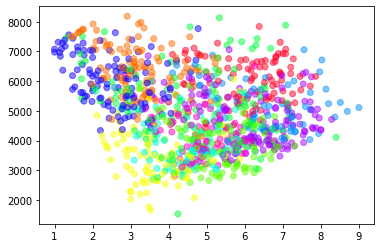

In [62]:

plt.scatter(x[:1000],y[:1000],c=model.labels_[:1000], cmap='gist_rainbow',alpha=0.5)